In [1]:
import numpy as np
import json
from pymatgen.core.structure import Structure
from smol.io import load_work, save_work
import os
from smol.moca import Ensemble
from smol.moca import Sampler
from smol.capp.generate import generate_random_ordered_occupancy



# create cluster expansion from scratch using modules 
import sys 
sys.path.append('../Modules')
from cluster_creator import prim_entry_dataloader, cluster_subspace_creator, structure_wrangler_creator 
from eci_fitter import eci_fitter
from structure_generation import create_cca_primitive, closest_composition

In [ ]:
# get the compositions 

In [2]:
# get a list of all the ensembles in the directory 
#expansion_path = '../Expansions/VCrTiWZr'
expansion_path = '../Expansions/VCrTi_fixed'

# get a list of all the ensembles in the directory
expansion_list = []
for root, dirs, files in os.walk(expansion_path):
    for file in files:
        if file.endswith('.mson'):
            expansion_list.append(os.path.join(root, file))

print(expansion_list)

['../Expansions/VCrTi_fixed/V0_605-Cr0_095-Ti0_3_fin_work.mson', '../Expansions/VCrTi_fixed/V0_90625-Cr0_046875-Ti0_046875_fin_work.mson', '../Expansions/VCrTi_fixed/V0_763-Cr0_126-Ti0_111_fin_work.mson', '../Expansions/VCrTi_fixed/V0_605-Cr0_3-Ti0_095_fin_work.mson']


In [17]:
expansion_list = ['../Expansions/VCrTiWZr/Cr0_0763-Ti0_0709-Zr0_0457-W0_0178-V0_7893_fin_work.mson']

The supercell size for the processor is 64 prims.
The ensemble has a total of 64 sites.
The active sublattices are:
Sublattice(site_space=V0.605 Cr0.095 Ti0.3 , sites=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]), active_sites=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]), encoding=array([0, 1, 2]))
Sampling information: Metadata(cls_name='SampleContainer', kernels=[Metadata(seed=306480005956707930730349749301522552180, step=Metadata(sublattices=[(Element Ti, Element V, Element Cr)], sublattice_probabilities=array([1

Sampling 1 chain(s) from a cell with 64 sites: 100%|██████████| 1000000/1000000 [00:44<00:00, 22513.23it/s]


Fraction of successful steps (efficiency) 0.000352
The last step energy is -565.1070111926379 eV
The minimum energy in trajectory is -565.2254278181848 eV
[-555.27844817 -560.01656827 -563.2061736  ... -565.09991609 -565.09991609
 -565.10701119]
A total of 10000 samples taken.
A total of 9900 samples used for production.
The average energy is -564.8116182022765 eV
The energy variance is 0.06175334306465241 eV^2
The sampling efficiency (acceptance rate) is approximately 0.000344034403440344
Full Formula (Ti19 V39 Cr6)
Reduced Formula: Ti19(V13Cr2)3
abc   :  10.426946  10.426946  10.426946
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (64)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  V     0     0     0
  1  V     0     0     0.25
  2  Cr    0     0     0.5
  3  V     0     0     0.75
  4  V     0     0.25  0
  5  V     0     0.25  0.25
  6  Ti    0     0.25  0.5
  7  Ti    0     0.25  0.75
  8  V     0     0.5   0
  9  Cr    0   

Sampling 1 chain(s) from a cell with 64 sites: 100%|██████████| 1000000/1000000 [00:42<00:00, 23381.07it/s]


Fraction of successful steps (efficiency) 0.001573
The last step energy is -572.7436475001816 eV
The minimum energy in trajectory is -573.0710020202569 eV
[-572.44510663 -572.93019372 -572.50193865 ... -572.71764342 -572.95495538
 -572.7436475 ]
A total of 10000 samples taken.
A total of 9900 samples used for production.
The average energy is -572.7371704048664 eV
The energy variance is 0.0357800681040679 eV^2
The sampling efficiency (acceptance rate) is approximately 0.001561156115611561
Full Formula (Ti3 V58 Cr3)
Reduced Formula: Ti3V58Cr3
abc   :  10.426946  10.426946  10.426946
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (64)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  V     0     0     0
  1  V     0     0     0.25
  2  V     0     0     0.5
  3  V     0     0     0.75
  4  V     0     0.25  0
  5  Ti    0     0.25  0.25
  6  V     0     0.25  0.5
  7  V     0     0.25  0.75
  8  V     0     0.5   0
  9  V     0     0.5 

Sampling 1 chain(s) from a cell with 64 sites: 100%|██████████| 1000000/1000000 [00:41<00:00, 23942.41it/s]


Fraction of successful steps (efficiency) 0.001065
The last step energy is -571.3745008444392 eV
The minimum energy in trajectory is -571.8831367382235 eV
[-570.39291984 -570.36430153 -570.57517074 ... -571.2987164  -571.43142302
 -571.37450084]
A total of 10000 samples taken.
A total of 9900 samples used for production.
The average energy is -570.9779474473876 eV
The energy variance is 0.11269498424719453 eV^2
The sampling efficiency (acceptance rate) is approximately 0.0010511051105110511
Full Formula (Ti7 V49 Cr8)
Reduced Formula: Ti7V49Cr8
abc   :  10.426946  10.426946  10.426946
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (64)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  V     0     0     0
  1  V     0     0     0.25
  2  V     0     0     0.5
  3  Ti    0     0     0.75
  4  Cr    0     0.25  0
  5  V     0     0.25  0.25
  6  Ti    0     0.25  0.5
  7  V     0     0.25  0.75
  8  V     0     0.5   0
  9  V     0     0.

Sampling 1 chain(s) from a cell with 64 sites: 100%|██████████| 1000000/1000000 [00:42<00:00, 23658.04it/s]


Fraction of successful steps (efficiency) 0.001227
The last step energy is -580.5649137257341 eV
The minimum energy in trajectory is -581.5829411047789 eV
[-580.39834131 -580.90420313 -580.65007425 ... -581.15418663 -580.24941615
 -580.56491373]
A total of 10000 samples taken.
A total of 9900 samples used for production.
The average energy is -580.6041614101184 eV
The energy variance is 0.145981954815612 eV^2
The sampling efficiency (acceptance rate) is approximately 0.001215121512151215
Full Formula (Ti6 V39 Cr19)
Reduced Formula: Ti6V39Cr19
abc   :  10.426946  10.426946  10.426946
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (64)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  V     0     0     0
  1  V     0     0     0.25
  2  Cr    0     0     0.5
  3  V     0     0     0.75
  4  V     0     0.25  0
  5  V     0     0.25  0.25
  6  V     0     0.25  0.5
  7  Cr    0     0.25  0.75
  8  Cr    0     0.5   0
  9  Ti    0     0.5

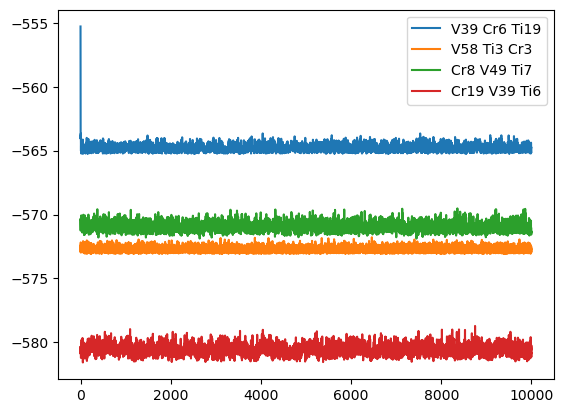

In [5]:
for i, expansion_path in enumerate(expansion_list):
    work = load_work(expansion_path)
    expansion = work['ClusterExpansion']
    # Create the ensemble
    # This specifies the size of the MC simulation domain.
    # this gives a 64 site unit cell
    sc_matrix = np.array([
        [4, 0, 0],
        [0, 4, 0],
        [0, 0, 4]
    ])
    # this convenience method will take care of creating the appropriate
    # processor for the given cluster expansion.
    #os.environ['OMP_NUM_THREADS'] = '4'
    ensemble = Ensemble.from_cluster_expansion(expansion, sc_matrix)
    ensemble.processor.num_threads_full = 5

    # In a real scenario you may want a much larger processor.size
    # An MC step is O(1) with the processor.size, meaning it runs at
    # the same speed regardless of the size. However, larger sizes
    # will need many more steps to reach equilibrium in an MC simulation.
    print(f'The supercell size for the processor is {ensemble.processor.size} prims.')
    print(f'The ensemble has a total of {ensemble.num_sites} sites.')
    print(f'The active sublattices are:')
    for sublattice in ensemble.sublattices:
        print(sublattice)


    # here we also set the temperature to our operating temperature, in V-Cr-Ti this should be around 900K 
    T_sample = 973.15
    sampler = Sampler.from_ensemble(ensemble, temperature=T_sample)
    print(f"Sampling information: {sampler.samples.metadata}")
    compositions = [sublattice.composition for sublattice in ensemble.sublattices]

    print(dir(sublattice))
    compositions = [sublattice.composition for sublattice in ensemble.sublattices]
    print(f'The compositions are {compositions}')
    try:
        # this will raise an error if the ensemble is not ordered
        init_occu = generate_random_ordered_occupancy(processor= ensemble.processor,
                                                    composition=compositions,
                                                    tol = 0.99,
                                                    rng=42)
    except:
        #raise ValueError('The ensemble is not ordered, please check the ensemble and try again.')
        print('The ensemble is not ordered, please check the ensemble and try again.')
        continue
    #init_occu = generate_random_ordered_occupancy(processor= ensemble.processor,
                                                #composition=compositions,
                                                #tol = 0.99,
                                                #rng=42)

    print(f"The disordered structure has composition: {ensemble.processor.structure.composition}")
    print(f"The initial occupancy has composition: {ensemble.processor.structure_from_occupancy(init_occu).composition}")

    print(f'The encoded occupancy is:\n{init_occu}')
    print(f'The initial occupancy is:\n {ensemble.processor.decode_occupancy(init_occu)}')

    # run 1M iterations
    # since this is the first run, the initial occupancy must be supplied
    sampler.run(
        1000000,
        initial_occupancies=init_occu,
        thin_by=100, # thin_by will save every 100th sample only
        progress=True
    ) # progress will show progress bar

    # Samples are saved in a sample container
    samples = sampler.samples

    print(f'Fraction of successful steps (efficiency) {sampler.efficiency()}')
    print(f'The last step energy is {samples.get_energies()[-1]} eV')
    print(f'The minimum energy in trajectory is {samples.get_minimum_energy()} eV')

    # You can get the minimum energy structure and current structure
    # by using the ensemble processor
    curr_s = ensemble.processor.structure_from_occupancy(samples.get_occupancies()[-1])
    min_s = ensemble.processor.structure_from_occupancy(samples.get_minimum_energy_occupancy())

    #from smol.moca.analysis.convergence import check_property_converged, determine_discard_number

    energies = samples.get_energies()
    # 100 as an initial guess for amount to discard
    #opt_discard = determine_discard_number(property_array=energies, init_discard=100, verbose=True)
    #converged = check_property_converged(energies[opt_discard:])
    #print(f'Is the energy converged after discarding the first {opt_discard} samples?', converged)
    print(energies)

    # let's plot the energy trajectories over time 

    import matplotlib.pyplot as plt
    runs = np.arange(len(energies))
    plt.plot(runs, energies,label=f'{ensemble.processor.structure_from_occupancy(init_occu).composition}')

    # Set 100 samples for burn-in, as determined in 5)
    discard = 100 # this is in terms of samples so it would be discard*thin_by steps
    print(f'A total of {len(samples)} samples taken.')
    print(f'A total of {len(samples.get_energies(discard=discard))} samples used for production.')
    print(f'The average energy is {samples.mean_energy(discard=discard)} eV')
    print(f'The energy variance is {samples.energy_variance(discard=discard)} eV^2')
    print(f'The sampling efficiency (acceptance rate) is approximately {samples.sampling_efficiency(discard=discard)}')


    #write these to cif files
    from pymatgen.io.cif import CifWriter
    structure_path = '../Visualization/Job_Structures/Pre_VASP/VCrTi_fixed_64'

    initial_structure = samples.get_sampled_structures(indices=[0])[0]
    print(initial_structure)

    # ChANGE THE NAME 
    # get the composition of the structure
    composition = initial_structure.composition.reduced_formula

    # Find the start and end of the substring
    start = expansion_path.find('VCrTi_fixed/') + len('VCrTi_fixed/')
    end = expansion_path.find('_fin_work.mson')

    # Extract the substring
    substring = expansion_path[start:end]

    # write the initial structure to a CIF file
    cif = CifWriter(initial_structure)
    total_initial_path = os.path.join(structure_path, substring + '_initial.cif')
    cif.write_file(total_initial_path)

    # print the last structure 
    final_structure = samples.get_sampled_structures(indices=[-1])[0]
    print(final_structure)

    # write the final structure to a CIF file
    cif = CifWriter(final_structure)
    total_final_path = os.path.join(structure_path, substring + '_final.cif')
    cif.write_file(total_final_path)
    
    # save the Sample container with the same name 
    total_sample_path = os.path.join(structure_path, substring + '_samples.mson')
    save_work(total_sample_path,samples)

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


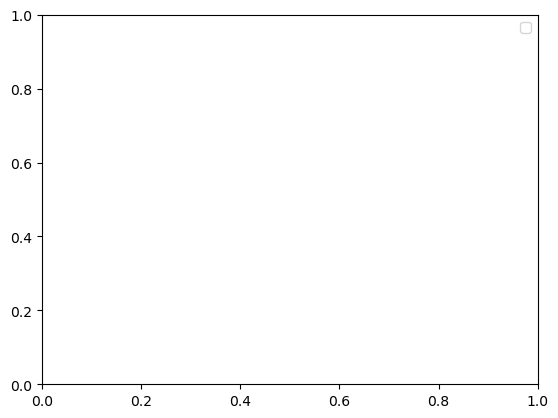